# Logistic Regression

## Logistic Regression

### Introduction to Classification

Classification refers to associating a target variable uniquely into one of the known classes. When number of classes are more than 2, then it is called multiclass classification. When the number of classes are two, then it is called binary classification. Logistic Regression is one of the popular type of classification techniques used. 

Consider the following type of scenario where the output y, varies with x as shown in the figure below where linear regression is used for fitting the model. 

<img src='../../../images/logistic-fig-1.png' style="width:35vw">

As you can see above the line does not pass through the data points. If they were to pass through the data points and 'fit' the data approximately well, then a Linear Regression model would be useful. Also, there are a good number of overlaps of 0s and 1s for the same value of X. This means that for a given age, it is difficult to tell if the person aboard the Titanic survived or dead easily with the above graph. This problem can be clearly identified as a classification problem as the output is a finite number, either a 0 or a 1. This is also an example of how Exploratory Data Analysis (EDA) can be useful by plotting the output variable, 'Survived' against one of the independent variables, 'Age'.


We cannot use a linear regression to model a binary response, because the predicted values of $y$ will not be limited to 0 or 1. Instead of $y$, we could model probability of $y$, but even then, the predicted values cannot be limited to values between 0 and 1. Also, the relationship is not linear, but sigmoidal or S-shaped. In such cases, a function of the probability is used. The most frequently used is the logit function which is the natural log of the odds of success. The logistic regression model is expressed as shown below.

$Ln \big(\frac{p(y)}{1-p(y)}\big) = \beta_0 + \sum\limits_{i=0}^{n}X_i\beta_i \quad$ where $p(y)$ is the probability of success.


The sigmoid function that is used in logistic regression is shown below:


<img src="../../../images/logistic_regression.png" style="width:45vw">


<br/>

## Exercise:

Given the data from Kaggle related to survivors of the Titanic, identify if the problem is a classification problem or regression problem without visualization.

- What command would you use to identify the problem? 
- assign the result to the variable titanic_stats

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



## Solution

```python
titanic_stats = train_data['Survived'].unique()
print(titanic_stats)
```




<br/><br/><br/>
## Titanic Survivors

Kaggle posted a famous dataset from Titanic. It was about the survivors amongst the people aboard. Here is the description from Kaggle:

### Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

source: https://www.kaggle.com/c/titanic

We shall use this dataset for analysis and study of logistic regression. 

### Loading the Data

The data has been split into train_data, test_data and can be loaded from kaggle with read_csv command:
```python
import pandas as pd
train_data = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv")
```

### Analysis of the Dataset

Let us perform EDA on the dataset to understand it better, prior to fitting the logistic regression model. Let us use distplot in seaborn to generate the distribution plot of those who survived and those who didn't:
```python
sns.distplot(train_data['Survived'])
```
<img src='https://s3.amazonaws.com/rfjh/media/CKEditorImages/2016/12/11/logistic-dist-2.png'/>

From the above distribution, it can be observed that those who survived are approximately 2/3rd in the training set.We can observe that there were children and mostly adults followed by lesser aged people with max of 80 years approximately. This can be observed by two peaks in the fitted distribution.

<br/>
## Exercise:

#### Visualizing the Age of People Aboard

Let us look at the distribution of age of people aboard. This is the histogram plot which shows the number of people (y-axis) in the age band.

 - Remove rows that have unknown Age using .notnull() over the Age column to detect the non-null entries.
 - Using the non-null entries plot the distribution using the sns.distplot() and assign the plot to variable, dist_plot.
 
<p>train_data[train_data['Age'].notnull() shows which rows have Age columns with values and not NaNs. Now reference the age over this dataframe and pass this into the function.</p>


In [2]:
# Modify the plot below and assign to the variable g


### Solution

```python
plt.ylabel('Probability')
dist_plot = sns.distplot(train_data[train_data['Age'].notnull()].Age)
```




<br/><br/><br/>
## Exploratory Data Analysis (EDA)

### Understanding Age

We do not have any prior information about how the age for child was defined in those years. The above information is helpful as we can categorize the people as child, adults and seniors by looking the peaks.

Let us define functions to categorize the age into these three categories with age of 16 and 48 as the defining separators from the graph.

```python
def person_type(x):
  if x <=16:
    return 'C'
  elif x <= 48:
    return 'A'
  elif x <= 90:
    return 'S'
  else:
    return 'U'
```
The above function categorizes the continous variable 'Age' into a categorized variable. We can use apply function to transform each entry in the Age column and assign it to Person.
```python
train_data['Person'] = train_data['Age'].apply(person_type)
test_data['Person'] = test_data['Age'].apply(person_type)
```
We can now look at who is likely to survive depending on the type of Person with a factor plot. A factor plot can consider another factor such as Sex along with the Age. 
```python
g = sns.factorplot(x="Person", y="Survived", hue="Sex", data=train_data,
                             size=5, kind="bar", palette="muted")
```
<img src='https://s3.amazonaws.com/rfjh/media/CKEditorImages/2017/04/25/sur_age_4r6lumS.png'/>

From the above plot you can see that senior women were most likely to survive with highest probability than anyone else. Now we can ignore the Sex type and visualize who was likely to survive.

<br/>
## Exercise:

- Using the information from the above graph, visualize the number of people who survived vs Person ignoring the Sex attribute. This will provide us information on who mostly survived in the dataset.

<p>Remove hue column as it is optional.</p>


In [4]:
def person_type(x):
   if x <=16:
     return 'C'
   elif x <= 48:
    return 'A'
   elif x <= 90:
     return 'S'
   else:
     return 'U'

train_data['Person'] = train_data['Age'].apply(person_type)



### Solution

```python
g = sns.factorplot(x='Person', y='Survived', data=train_data,  size=5, kind='bar', palette='muted')
                   
```




<br/><br/><br/>
## Chances of Survival

Let us now look at the class from which people had better chances of survival:
```python
g = sns.factorplot(x="Pclass", y="Survived", data=train_data, size=5, kind="bar", palette="muted")
```
<img src='https://s3.amazonaws.com/rfjh/media/CKEditorImages/2016/12/11/log-pclass-6_vOjuWWH.png'/>

We can see that 1st class passengers had much better chances of survival. We can also visualize the distribution of Male and Female using a violin plot. This is very useful to measure the mean and variance of passengers as to their likelihood of survival in each class grouped by Male and Female. The distribution graphs are shown on either side of the line for each class.
```python
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="Pclass", y="Survived", hue="Sex", data=train_data, split=True,
...            inner="quart", palette={"male": "b", "female": "y"})
```
<img src='https://s3.amazonaws.com/rfjh/media/CKEditorImages/2016/12/11/log-violin-7.png'/>

From the above plot you can see that in 1st class, females were more likely to survive and in the 3rd class, most men were unlikely to survive. 

<br/>

## Exercise:

- Generate a violin plot of type of person vs Survived for both men and women
- What do you interpret from the visualization?

<p>replace Pclass with Person.</p>

<p>train_data['Person'] = train_data['Age'].apply(person_type)<br />
 </p>

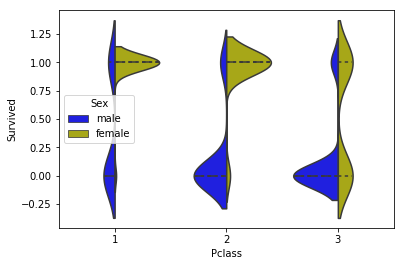

In [5]:
# Modify the code below
g = sns.violinplot(x='Pclass', y='Survived', hue='Sex', data=train_data, split=True, inner='quart', palette={'male': 'b', 'female': 'y'})


### Solution
 
```python

train_data['Person'] = train_data['Age'].apply(person_type)
g = sns.violinplot(x='Person', y='Survived', hue='Sex', data=train_data, split=True, inner='quart', palette={'male': 'b', 'female': 'y'})
```

# Logistic Regression: Model Building and Implementation

<br/><br/><br/>
## Titanic Survivors - Data Selection & Preparation

Prior to fitting a logistic regression model for classifying who would likely survive, we have to examine the dataset with information from EDA as well as using other statistical methods. The logistic regression algorithm is also a supervised learning technique. 

The dataset from training and testing has data that cannot be directly used due to many issues including but not limited to:

- Sparse column entries in certain columns such as Cabin.
- NaN entries in columns.
- Categorical variables with string entries.
- Selection of right columns.


### Sparsity

Let us examine sparse columns by counting the ratio of NaNs to all the values. describe() function on dataframe provides information about mean, median and the number of values ignoring NaNs only for float/integer columns. 

train_data.describe()
`<pre>
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200
</pre>
The count row provides information about how many values exist with rest being NaNs.

### Age

We can see that Age column has 714 entries with missing (891 - 714 = 177) values. This would be 177/891 = 0.19 or approximately 20% of missing values. If this percentage was small, we could choose to ignore those rows for fitting a logistic regression model. There are various methods to fill the missing values. But before we discuss the ways to fix the issue of Age column sparsity, let us examine other columns as well.

### PassengerId, Name, Ticket

We can see that PassengerId, Name and Ticket are all unique to each person and hence will not serve as columns for modeling. Logistic Regression or any supervised or unsupervised learning methods need to understand patterns in the dataset. This is a necessary condition, so that algorithms can make sense of the data available by mathematically recording these patterns. Hence, Ids, Names are usually candidates that aren't useful for modeling. They are needed for identifying the person post recommendation, prediction or classification. They are also going to be useful later for other columns, thereby improving the overall dataset. 

### Cabin

The Cabin column is really sparse with just (148/891 = 0.16) 16% data available. You can use len(train_data.Cabin.unique()) to determine the total length. When data is very sparse, we can ignore it for modeling in the first iteration. Later for improving the fit, this column can be investigated deeper to extract more information.

### Embarked

This data shows the point where passengers Embarked. It has very less sparsity with train_data[train_data.Embarked.notnull()] = 889 which is nearly all the data (891). Hence, it can be useful for modeling.

### Person

This is a column we created ourselves by splitting up age into different bands of Child, Adult, Senior and Unknown. We have to determine how any Unknown people are there so that we can build better models. Since, this variable depends directly on age, if we can fix the sparsity of age, this will be fixed as well.

<br/>

## Exercise:

The Fare column has no sparsity and is complete.

- Generate a plot to visualize Fare just as we did visualize Age.
- Write down what bands would be able to split the Fare into.
- Assign the plot to variable fare_plot as shown in the code below.

<p>You don't need to look for NaNs as Fare is a complete set.</p>

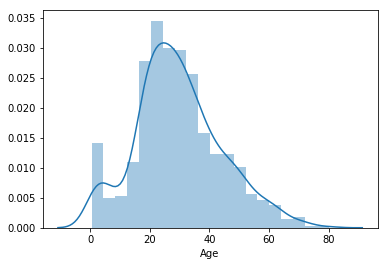

In [8]:

ind_var = train_data[train_data['Age'].notnull()].Age
fare_plot = sns.distplot(ind_var)



### Solution

```python
ind_var = train_data['Fare']
fare_plot = sns.distplot(ind_var)
```




<br/><br/><br/>
## Statistical Imputations

### Dummy Variables

Dummy variables are numerical values used in place of categorical variables. These are necessary to convert range of unique set of strings or numbers into a unique array of values that represents the string. The columns, 'Sex' and 'Embarked' are categorical variables with string content. 

### Sex Column

The Sex column has entries male or female. This column could be mapped into two columns of male and female. We can then have 1s and 0s to indicate if the row is male or female. Since it is mutually exclusive that the row is either a male or a female and hence the columns can only have the following entries:
<table border="1" cellpadding="1" cellspacing="1" style="width:500px">
	<tbody>
		<tr>
			<td>Male</td>
			<td>Female</td>
		</tr>
		<tr>
			<td>0</td>
			<td>1</td>
		</tr>
		<tr>
			<td>1</td>
			<td>0</td>
		</tr>
	</tbody>
</table>

After this transform the logistic regression model can also 'mathematically model' or understand that the row refers to either male or female without having to go through the Sex column with string content. What happens if we eliminate one of the columns such as the Male column as below?

<table border="1" cellpadding="1" cellspacing="1" style="width:500px">
	<tbody>
		<tr>
			<td>Female</td>
		</tr>
		<tr>
			<td>0</td>
		</tr>
		<tr>
			<td>1</td>
		</tr>
	</tbody>
</table>

We can still determine uniquely if the subject is a female or not, where 0 represents absence and 1 represents presence. This step of elimination of a single column in a range of dummy variables not only reduces complexity for modeling with lesser columns conveying the information but also necessary due to mathematical reasons. When all the columns are added, a singularity matrix can occur which gives an error in classification.

Imputation refers to methods of substituting estimates for missing values in the data. This is an important step that can train the model better as more data becomes available post imputations. There are many known methods of imputations. Sometime, by analysis and EDA, we can design custom imputation methods that provide best statistical estimates for the missing value. This reduces sparsity in the dataset. In the Titanic dataset, let us start investigating various methods to impute sparse columns.

### Age Column

To impute the age column, we can use the name information. How many of names with Mr., Mrs., Miss and Master exist and use the mean values for each where the ages are missing. Here are the estimates for each category:
```python
miss_est = train_data[train_data['Name'].str.contains('Miss. ')].Age.mean()
21.773972602739725
master_est = train_data[train_data['Name'].str.contains('Master. ')].Age.mean()
4.5741666666666667
mrs_est = train_data[train_data['Name'].str.contains('Mrs. ')].Age.mean()
35.898148148148145
mr_est = train_data[train_data['Name'].str.contains('Mr. ')].Age.mean()
32.332089552238806
```

The above estimates can be improved further by considering the Parents column as those names containing Master and Miss would have a subset of children (unmarried referring to Master & Miss). Here is a function that takes all of these rules into consideration:
<pre>
girl_child_est = train_data[train_data['Name'].str.contains('Miss. ') & (train_data['Parch'] == 1)].Age.mean()
3.696

boy_child_est = train_data[train_data['Name'].str.contains('Master. ') & (train_data['Parch'] == 1)].Age.mean()
12.0

woman_adult_est = train_data[train_data['Name'].str.contains('Miss. ') & (train_data['Parch'] == 0)].Age.mean()
27.763

man_adult_est = train_data[train_data['Name'].str.contains('Master. ') & (train_data['Parch'] == 1)].Age.mean()
12.0

woman_married_est = train_data[train_data['Name'].str.contains('Mrs. ')].Age.mean()
35.898

man_married_est = train_data[train_data['Name'].str.contains('Mr. ')].Age.mean()
32.332089552238806
</pre>
We shall use the above estimates with an imputation function that we will build based on the same rules as above. Math function is imported as to check for NaNs outside of dataframe methods, it is needed. 
```python
import math
def impute_age(row):
  if math.isnan(row[5]):
    if ((('Miss. ') in row[3]) and (row[7] == 1)):
      return girl_child_est
    elif ((('Master. ') in row[3]) and (row[7] == 1)):
      return boy_child_est
    elif ((('Miss. ') in row[3]) and (row[7] == 0)):
      return woman_adult_est
    elif (('Mrs. ') in row[3]):
      return woman_married_est
    else:
      return man_married_est
  else:
    return row[5]
```
    
Dataframe has an apply method that can apply this function to either each element in the dataframe or to each row. To specify row instead of applying the function to each element, pass axis=1 to the function:
```python
train_data['Imputed_Age'] = train_data.apply(impute_age, axis=1)
test_data['Imputed_Age'] = test_data.apply(impute_age, axis=1)
```
<br/>

## Exercise:

apply function on dataframes as shown in the code section below operates on every single row; i.e, every row is passed on to the impute_age function which returns the estimated age when it doesn't exist. 

 - Given the math function, math.isnan(x) which returns if the result is a Nan or Not, use it at the approriate place in the code below, and create a new column called - Imputed_Age to contain ages where they exist as well as imputed ages in place of NaNs.
- Assign the column Imputed_Age to variable imputed_age.
- print out first few rows using the .head() command.

<p>use train_data.head() or .columns to determine the index of age in each row and use that with math.isnan(x)</p>

In [10]:
import math
import statsmodels.api as sm
from sklearn.metrics import roc_curve, roc_auc_score

girl_child_est = train_data[train_data['Name'].str.contains('Miss. ') & (train_data['Parch'] == 1)].Age.mean()
boy_child_est = train_data[train_data['Name'].str.contains('Master. ') & (train_data['Parch'] == 1)].Age.mean()
woman_adult_est = train_data[train_data['Name'].str.contains('Miss. ') & (train_data['Parch'] == 0)].Age.mean()
man_adult_est = train_data[train_data['Name'].str.contains('Master. ') & (train_data['Parch'] == 1)].Age.mean()
woman_married_est = train_data[train_data['Name'].str.contains('Mrs. ')].Age.mean()
man_married_est = train_data[train_data['Name'].str.contains('Mr. ')].Age.mean()

# Modify and uncomment the code below to impute the age.
#def impute_age(row):
#    if ((('Miss. ') in row[3]) and (row[7] == 1)):
#      return girl_child_est
#   elif ((('Master. ') in row[3]) and (row[7] == 1)):
#      return boy_child_est
#    elif ((('Miss. ') in row[3]) and (row[7] == 0)):
#      return woman_adult_est
#    elif (('Mrs. ') in row[3]):
#      return woman_married_est
#    else:
#      return man_married_est


#train_data['Imputed_Age'] = train_data.apply(impute_age, axis=1)



### Solution

```python
def impute_age(row):
    if math.isnan(row[5]):
        if ((('Miss. ') in row[3]) and (row[7] == 1)):
            return girl_child_est
        elif ((('Master. ') in row[3]) and (row[7] == 1)):
            return boy_child_est
        elif ((('Miss. ') in row[3]) and (row[7] == 0)):
            return woman_adult_est
        elif (('Mrs. ') in row[3]):
            return woman_married_est
        else:
            return man_married_est
    else:
        return row[5]

train_data['Imputed_Age'] = train_data.apply(impute_age, axis=1)
test_data['Imputed_Age'] = test_data.apply(impute_age, axis=1)

imputed_age = train_data['Imputed_Age']
train_data.head()
```




<br/><br/><br/>
## ROC Curves

### Working with Categorical Variables 

Categorical variables are variables where the values belong to a finite set. For example, the days of the week (0-7), Sex (Male/Female) are categorical variables. These categorical variables such as where the person embarked the ship, the sex need to be split up into separate columns so that the logistic regression model can understand them. To do so, we use dummy variables. These dummy variables encode the categorical variables into a set of 0s & 1 where 0 indicates absence of the feature and 1 indicates presence of the feature. Hence, the logistic regression model can tune to this dataset. Here, we have used the get_dummies to prepare the dataset.
```python
train_embarked = pd.get_dummies(train_data['Embarked'])
train_sex = pd.get_dummies(train_data['Sex'])
train_data = train_data.join([train_embarked, train_sex])
test_embarked = pd.get_dummies(test_data['Embarked'])
test_sex = pd.get_dummies(test_data['Sex'])
test_data = test_data.join([test_embarked, test_sex])
train_data['Age_Imputed']=train_data.apply(impute_age, axis=1)
test_data['Age_Imputed']=test_data.apply(impute_age, axis=1)
train_data.head()
```

ROC is a short form of Region of Convergence. We need to choose a threshold that best provides the estimate of classes. Before we proceed with understanding ROC curves we need to understand a confusion matrix that is used to analyse the performance of the classifier. Suppose we are trying to predict class A, then:

### Confusion Matrix:

<table border="1" cellpadding="1" cellspacing="1" style="width:500px">
	<thead>
		<tr>
			<th scope="col">&nbsp;</th>
			<th scope="col">Class A</th>
			<th scope="col">Not Class A</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td>&nbsp;"Class A" Prediction</td>
			<td>True Positive</td>
			<td>False Positive</td>
		</tr>
		<tr>
			<td>&nbsp;"Not Class A" Prediction</td>
			<td>False Negative</td>
			<td>True Negative</td>
		</tr>
	</tbody>
</table>
 	
- Sensitivity or True positive rate : TPR=TP/(TP+FN) 
- False positive rate: FPR=FP/(FP+TN)
- True negative rate (or specificity): TNR=TN/(FP+TN)
- Total accuracy = (TP + TN)/(TP + FN + FP + TN)
- From the total accuracy formula, you can observe that the goal is to minimize False Postives and False Negatives. 

Let us use ROC functions from sklearn:
```python
from sklearn.metrics import roc_curve, roc_auc_score
roc_survival = roc_curve(train_data[['Survived']], y_pred)
```
ROC plots are plots of True Positives vs False Positives. Hence we need the top left curve to be closer to the upper and left axis as much as possible to increase performance. 

Seaborn visualization is better than matplotlib. Matplotlib is a basic visualization tool and we can use it with seaborn styles. 
```python
sns.set_style("whitegrid")
plt.plot(roc_survival[0], roc_survival[1])
plt.show()
```
The above curve is how a typical ROC curve looks like and you should quickly be able to identify it. We would want to improve the fit, which would imply pushing the curve closer to left and top axis, minimizing False positives and maximizing True positives.

<br/>

## Exercise:

Train the logistic regression model for all input features in the same order as it is present in the dataframe columns. Use those features you think are best suited and get the predictions on training data. 

- Plot the ROC curve and assign it to the variable roc_plot. Use roc_survival variable to compute ROC.
- How different is the ROC curve from the previous ROC curve for model trained with one feature?

<p>Include all features and generate the ROC curve. </p>

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

# You dont want this to join twice if you are attempting this lesson multiple times.

try:
    train_embarked = pd.get_dummies(train_data['Embarked'])
    train_sex = pd.get_dummies(train_data['Sex'])
    train_data = train_data.join([train_embarked, train_sex])

    test_embarked = pd.get_dummies(test_data['Embarked']) 
    test_sex = pd.get_dummies(test_data['Sex'])
    test_data = test_data.join([test_embarked, test_sex])
except:
    print("The columns have categorical variables")

# Modify the features list to include the relevant features and plot the roc curve.

features = ['Fare']
log_model = sm.Logit(train_data['Survived'], train_data[features]).fit()
y_pred = log_model.predict(train_data[features])



Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4


### Solution

```python
features = ['Pclass', 'Imputed_Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'female']
log_model = sm.Logit(train_data['Survived'], train_data[features]).fit()
y_pred = log_model.predict(train_data[features])
roc_survival = roc_curve(train_data['Survived'], y_pred)
sns.set_style("whitegrid")
sns.plt.xlabel('False Positive Rate')
sns.plt.ylabel('True Positive Rate')
roc_plot = sns.plt.plot(roc_survival[0], roc_survival[1])
roc_plot
```




<br/><br/><br/>
## Logistic Regression using Scikit-Learn

Here we shall learn how to perform modeling using scikit-learn.
```python
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
```

Instantiate a logistic regression model as:
```python
log_sci_model = LogisticRegression()
```

Train the model with 'Fare':
```python
log_sci_model = log_sci_model.fit(train_data['Fare'], train_data['Survived'])
```
Measure the performance of the trained model over the training set:
```python
log_sci_model.score(train_data['Fare'], train_data['Survived'])
0.66554433221099885
```

<br/>

## Exercise:

Train the model with all possible features.

- Assign all the list of features to the variable, features.
- Train using scikit learn logistic regression module.
- Get the prediction on the training set and print out the score.

<p>change features list</p>

In [12]:
from sklearn import metrics, cross_validation
from sklearn.linear_model import LogisticRegression

# Modify the code below to include all possible features.

features = ['Fare']

log_sci_model = LogisticRegression()
log_sci_model = log_sci_model.fit(train_data[features], train_data['Survived'])
log_sci_model.score(train_data[features], train_data['Survived'])



/home/mani/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.6655443322109988

### Solution

```python
features = ['Pclass', 'Imputed_Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'female']

log_sci_model = LogisticRegression()
log_sci_model = log_sci_model.fit(train_data[features], train_data['Survived'])
log_score = log_sci_model.score(train_data[features], train_data['Survived'])
print(log_score)
```